In [1]:
import utils
import math
import matplotlib.pyplot as plt
import numpy as np
import time
import edge_topology
from triangulation import triangulate, triangulate_dwyer
import statistics

In [2]:
def generate_random_point_scatter(num_points, range_list):
    x_range = range_list[0:2]
    y_range = range_list[2:4]
    if len(x_range) != 2 or len(y_range) != 2:
        raise ValueError("Range list inputs invalid")
    if x_range[0] > x_range[1] or y_range[0] > y_range[1]:
        raise ValueError("Range list min max order is invalid")
    x_values = np.random.uniform(x_range[0], x_range[1], num_points)
    y_values = np.random.uniform(y_range[0], y_range[1], num_points)
    points = np.dstack((x_values, y_values))
    return points[0]

In [3]:
def plot_triangulation(triangulation, plane_bounds = [0, 10, 0, 10]):
    x_coords = []
    y_coords = []
    for edge in triangulation.edges:
        if not edge.deactivate:
            index_1 = edge.org
            index_2 = edge.dest
            coord_1, coord_2 = (triangulation.points[index_1], triangulation.points[index_2])
            x_coords.append([coord_1[0], coord_2[0]])
            y_coords.append([coord_1[1], coord_2[1]])
    for x_coord, y_coord in zip(x_coords, y_coords):
        plt.plot(x_coord, y_coord)
        plt.axis(plane_bounds)
    plt.show()

In [4]:
def run_experiment(sample_points, plane_bounds, trials = 10):
    sg_results = []
    dw_results = []
    for sample_point in sample_points:
        sg_trial_times = []
        for trial_iteration in range(trials):
            positions = generate_random_point_scatter(sample_point, plane_bounds)
            start = time.time()
            triangulation = triangulate(positions)
            elapsed = time.time() - start
            sg_trial_times.append(elapsed)
        
        dw_trial_times = []
        for trial_iteration in range(trials):
            positions = generate_random_point_scatter(sample_point, plane_bounds)
            start = time.time()
            triangulation = triangulate_dwyer(positions)
            elapsed = time.time() - start
            dw_trial_times.append(elapsed)
        
        sg_results.append(sg_trial_times)
        dw_results.append(dw_trial_times)
    
    result = {
        'stolfi_guibas': sg_results,
        'dwyer': dw_results
    }
    
    return result

def format_plot_metrics(data):
    formatted_result = {}
    for algo_name, algo_data in data.items():
        formatted_result[algo_name] = {}
        average_times = [statistics.mean(algo_data_sample_point) for algo_data_sample_point in algo_data]
        standard_deviations = [statistics.stdev(algo_data_sample_point) for algo_data_sample_point in algo_data]
        formatted_result[algo_name]['average_times'] = average_times
        formatted_result[algo_name]['stdevs'] = standard_deviations
    return formatted_result
    

In [5]:
%load_ext autoreload
%autoreload 2

## Generate Random Points

In [6]:
freeze = False
if not freeze:

    plane_bounds = [0, 10, 0, 10]
    num_points = 50

    positions = generate_random_point_scatter(num_points, plane_bounds)
    print(positions)

[[2.5790744  5.8558011 ]
 [2.68336528 6.68705636]
 [0.72591039 1.93564772]
 [1.81594372 4.00720824]
 [2.94953675 7.64229491]
 [0.16503356 1.16163216]
 [2.98781613 1.04075579]
 [9.87888983 6.01460369]
 [2.04791466 1.80417925]
 [2.83068854 4.8168246 ]
 [5.97405524 7.92714287]
 [3.50118969 1.7493102 ]
 [7.03121995 5.97105176]
 [9.89235757 3.59924503]
 [9.72211545 1.70482447]
 [8.32464767 5.29686056]
 [5.82976566 0.82517573]
 [7.46264804 8.29189952]
 [8.78902872 7.10938364]
 [5.77705182 4.45979145]
 [5.69715287 3.00351643]
 [4.64367507 6.47887051]
 [1.10845345 6.86895827]
 [1.36655118 2.39179205]
 [9.63155153 6.66463706]
 [8.02438768 7.60032163]
 [6.64209028 4.76775322]
 [9.56245056 9.56226819]
 [7.33027747 5.43158559]
 [3.25053301 7.35105854]
 [6.73014603 1.80063393]
 [2.39710949 4.25984169]
 [5.41563091 2.64499772]
 [0.05311226 3.69482125]
 [4.34077643 6.01203529]
 [6.29696603 8.72295401]
 [6.21943771 5.50388601]
 [5.0120631  9.15298684]
 [8.58071516 9.87507815]
 [1.04160881 7.47603371]


## Stolfi & Guibas Implementation

50 27.589 ms


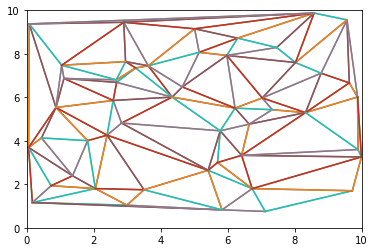

In [7]:
start = time.time()
triangulation = triangulate(positions)
elapsed = time.time() - start
print(f"{num_points} {elapsed*1000:0.3f} ms")
plot_triangulation(triangulation, [0, 10, 0, 10])

## Dwyer Implementation

50 24.843 ms


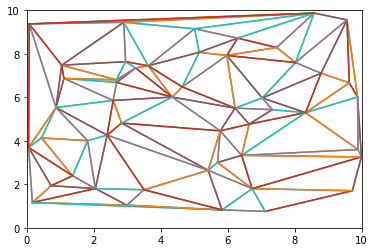

In [8]:
start = time.time()
triangulation = triangulate_dwyer(positions)
elapsed = time.time() - start
print(f"{num_points} {elapsed*1000:0.3f} ms")
plot_triangulation(triangulation, [0, 10, 0, 10])

## Compare algorithms on a square field 

In [28]:
sample_points = [10, 100, 1000]

In [29]:
plane_bounds = [0, 10, 0, 10]
trials = 10
results_data = run_experiment(sample_points, plane_bounds, trials=trials)
plot_metrics = format_plot_metrics(results_data)

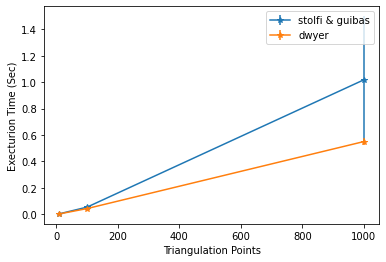

In [30]:
plt.errorbar(sample_points, plot_metrics['stolfi_guibas']['average_times'], plot_metrics['stolfi_guibas']['stdevs'], marker='*', label='stolfi & guibas')
plt.errorbar(sample_points, plot_metrics['dwyer']['average_times'], plot_metrics['dwyer']['stdevs'], marker='*', label='dwyer')

plt.xlabel('Triangulation Points')
plt.ylabel('Execturion Time (Sec)')
plt.legend()

plt.show()

## Compare algorithms on a narrow rectangular strip

In [31]:
plane_bounds = [0, 1, 0, 10000]
results_data = run_experiment(sample_points, plane_bounds, trials=trials)
plot_metrics = format_plot_metrics(results_data)

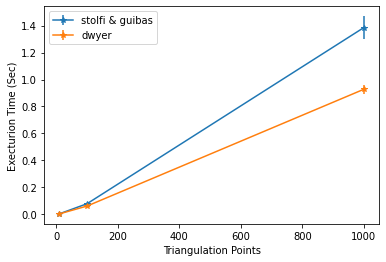

In [32]:
plt.errorbar(sample_points, plot_metrics['stolfi_guibas']['average_times'], plot_metrics['stolfi_guibas']['stdevs'], marker='*', label='stolfi & guibas')
plt.errorbar(sample_points, plot_metrics['dwyer']['average_times'], plot_metrics['dwyer']['stdevs'], marker='*', label='dwyer')

plt.xlabel('Triangulation Points')
plt.ylabel('Execturion Time (Sec)')
plt.legend()

plt.show()

## Compare algorithms on a line

In [33]:
plane_bounds = [0, 0, 0, 10000]
results_data = run_experiment(sample_points, plane_bounds, trials=trials)
plot_metrics = format_plot_metrics(results_data)

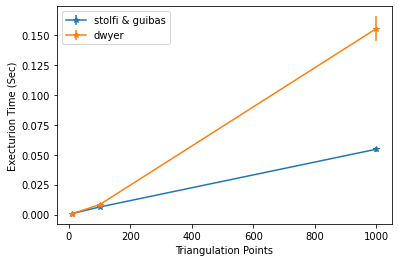

In [34]:
plt.errorbar(sample_points, plot_metrics['stolfi_guibas']['average_times'], plot_metrics['stolfi_guibas']['stdevs'], marker='*', label='stolfi & guibas')
plt.errorbar(sample_points, plot_metrics['dwyer']['average_times'], plot_metrics['dwyer']['stdevs'], marker='*', label='dwyer')

plt.xlabel('Triangulation Points')
plt.ylabel('Execturion Time (Sec)')
plt.legend()

plt.show()

## Compare algorithms on a narrow horizontal strip

In [35]:
plane_bounds = [0, 10000, 0, 1]
results_data = run_experiment(sample_points, plane_bounds, trials=trials)
plot_metrics = format_plot_metrics(results_data)

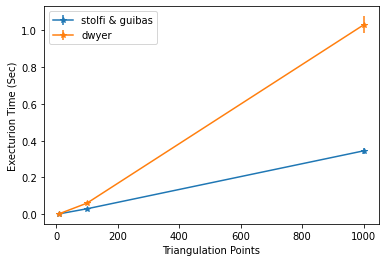

In [36]:
plt.errorbar(sample_points, plot_metrics['stolfi_guibas']['average_times'], plot_metrics['stolfi_guibas']['stdevs'], marker='*', label='stolfi & guibas')
plt.errorbar(sample_points, plot_metrics['dwyer']['average_times'], plot_metrics['dwyer']['stdevs'], marker='*', label='dwyer')

plt.xlabel('Triangulation Points')
plt.ylabel('Execturion Time (Sec)')
plt.legend()

plt.show()

## Conclusions

**For the divide-and-conquer algorithm only: Can you create a point set for which the vertical cuts
algorithm is notably faster than the alternating cuts algorithm? What do you think accounts for the
discrepancy?**

The vertical-horizontal hybrid cuts algorithm (Dwyer) was notably, but not significantly faster than the horizontal cuts aglorithm (Stolfi & Guibas) for the narrow vertical strip test. I hypothesize that horizontal sorting has less of an effect because most the point variance is vertical. 

For the square sample field test, the dwyer implementation showed a complexity much closer to linear than the Stolfi and Guibas implementation. This is expected because the Dwyer implementation is O(n log log n) wheras the Stolfi and Guibas implementation is O(n log n).

Interestingly enough, the Stolfi & Guibas implementation outperformed the Dwyer implementation when for the vertical line implementation, which I hypothesize is due to the greater impact of overhead for the Dwyer implementation. 

Finally, the Stolfi & Guibas implementation outperformed the Dwyer implementation on the narrow horizontal strip test probably due to the overhead of Dwyer and the reduced effectiveness of vertical sorthing.

**NOTE: This was the largest number of triangulation points I could reasonably run and have the algorithm terminate.**